<a href="https://colab.research.google.com/github/CaseyTomchuk/restaurant-revenue-model/blob/main/project_submission_GoldenBulls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scenario
##Project R2: Restaurant Revenue Prediction
Business Context: A restaurant chain wants to forecast monthly revenue for new locations to make better expansion decisions and resource allocation.

Dataset: restaurant_revenue.csv - Target: Monthly_Revenue (continuous) - Features: 3 variables including location foot traffic, local population density, and number of competing restaurants - Size: 800 restaurant-months - Note: Includes non-linear relationships with diminishing returns

Business Question: How can we predict revenue for potential new locations?

# Data-Driven Site Selection: Restaurant Revenue Prediction

**Team Name**: Golden Bulls

**Team Members**:
- Armin Miralrio
- Casey Tomchuk
- Louis Alexander Hoffman

**Project**: R2: Restaurant Revenue Prediction

**Date**: Dec 3, 2025

---

## 1. Introduction

### Business Context

The restaurant chain is facing a critical decision regarding expansion and resource allocation for new locations. The main stakeholders in this scenario include company executives, location managers, finance and operations teams, as well as marketing and site selection analysts, all of whom depend on accurate financial forecasting to make informed decisions. This business problem is important because opening a new restaurant involves significant investments of time, capital, and resources, and inaccurate revenue forecasts can lead to costly mistakes, such as choosing suboptimal locations or misallocating resources. As a result, the purpose of this analysis is to develop a model that can reliably predict monthly revenue for potential new restaurant sites. Such a model will support the company's decision-making process by enabling data-driven location selection, better investment justification, and more effective deployment of resources, ultimately supporting the company's growth objectives and overall profitability.

### Research Question

How accurately can we predict the monthly revenue of potential new restaurant locations using features such as location foot traffic, local population density, and the number of competing restaurants?

### Dataset Description

**Location_Foot_Traffic:** Integer. Measures the amount of foot traffic near each restaurant location (e.g., number of people passing by per month).

**Local_Population_Density:** Integer. Represents the estimated population density around the restaurant location.

**Competing_Restaurants:** Integer. The number of competing restaurants in the local vicinity.

**Monthly_Revenue (target variable):** Integer (continuous). The monthly revenue (in dollars) earned by each restaurant; serves as the target for regression.

*   Range: $102,862 to $200,000

*   Mean approx. $164,231
*   Normally distributed with moderate variance

## 2. Setup and Data Loading

In [ ]:
# Import required libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
)

# Settings
np.random.seed(42)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset
df= pd.read_csv('restaurant_revenue.csv')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst few rows:")
df.head()

Dataset loaded: 800 rows, 4 columns

First few rows:


,Location_Foot_Traffic,Local_Population_Density,Competing_Restaurants,Monthly_Revenue
0,4828,4187,6,192424
1,1781,1000,10,128106
2,2006,5196,7,172474
3,4219,1899,7,170850
4,4037,1000,9,157511


---
## 3. Exploratory Data Analysis


### 3.1 Data Overview

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print("="*70)
df.info()

print("\n" + "="*70)
print("Descriptive Statistics for Monthly_Revenue:")
print("="*70)
print(df['Monthly_Revenue'].describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Location_Foot_Traffic     800 non-null    int64
 1   Local_Population_Density  800 non-null    int64
 2   Competing_Restaurants     800 non-null    int64
 3   Monthly_Revenue           800 non-null    int64
dtypes: int64(4)
memory usage: 25.1 KB

Descriptive Statistics for Monthly_Revenue:
count       800.000000
mean     164231.791250
std       18794.914711
min      102862.000000
25%      150817.250000
50%      164244.500000
75%      177029.000000
max      200000.000000
Name: Monthly_Revenue, dtype: float64


---

# Dataset Information:
The dataset contains 800 entries and 4 columns. All columns (*Location_Foot_Traffic*, *Local_Population_Density*, *Competing_Restaurants*, and *Monthly_Revenue*) are of integer type (int64).

**Missing Values:** There are no missing values in the dataset, which is great for data quality.

# Descriptive Statistics for Monthly_Revenue:
**Count:** 800 observations.

**Mean:** The average monthly revenue is approximately $164,231.79.

**Standard Deviation (std):** The revenue values vary by about $18,794.91 from the mean.

**Min:** The lowest recorded monthly revenue is $102,862.

**25% (Q1):** 25% of the restaurants have a monthly revenue of $150,817.25 or less.

**50% (Median):** The median monthly revenue is $164,244.50, which is very close to the mean, suggesting a fairly symmetrical distribution.

**75% (Q3):** 75% of the restaurants have a monthly revenue of $177,029.00 or less.

**Max:** The highest recorded monthly revenue is $200,000.

### 3.2 Target Variable Distribution

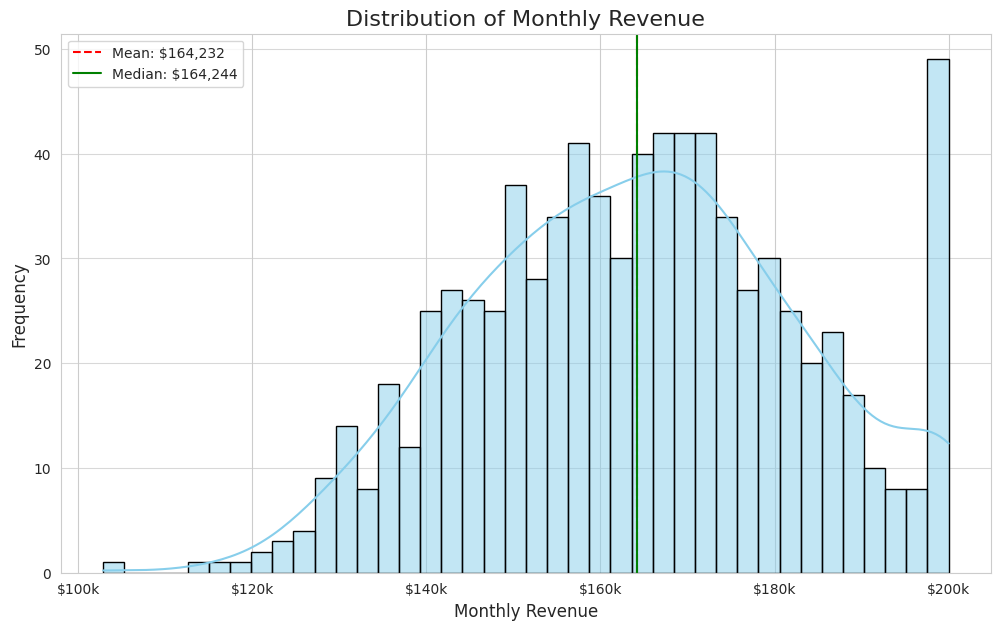

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df['Monthly_Revenue'], kde=True, bins=40, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
mean_revenue = df['Monthly_Revenue'].mean()
median_revenue = df['Monthly_Revenue'].median()

plt.axvline(mean_revenue, color='red', linestyle='--', label=f'Mean: ${mean_revenue:,.0f}')
plt.axvline(median_revenue, color='green', linestyle='-', label=f'Median: ${median_revenue:,.0f}')

plt.title('Distribution of Monthly Revenue', fontsize=16)
plt.xlabel('Monthly Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Custom formatter for x-axis ticks
formatter = FuncFormatter(lambda x, p: f'${x/1000:,.0f}k')
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

---
**Shape of Distribution:** The histogram shows a generally symmetrical, bell-shaped distribution, which is characteristic of a normal or near-normal distribution. This means that most restaurants fall within a central range of monthly revenue, with fewer restaurants at the very low or very high ends.

**Mean vs. Median:** The red dashed line (mean) and the green solid line (median) are very close to each other, both hovering around $164,000.
This proximity further confirms the symmetrical nature of the distribution. If the mean and median were far apart, it would suggest skewness (e.g., a long tail to one side due to outliers).

**Revenue Range:** The bulk of the monthly revenues appear to be concentrated between approximately $164,000. This proximity further confirms the symmetrical nature of the distribution. This distribution suggests that 'Monthly_Revenue' is well-behaved for a regression task, without extreme outliers heavily skewing the data, and indicating that linear models might perform reasonably well.

### 3.3 Feature Distributions and Relationships

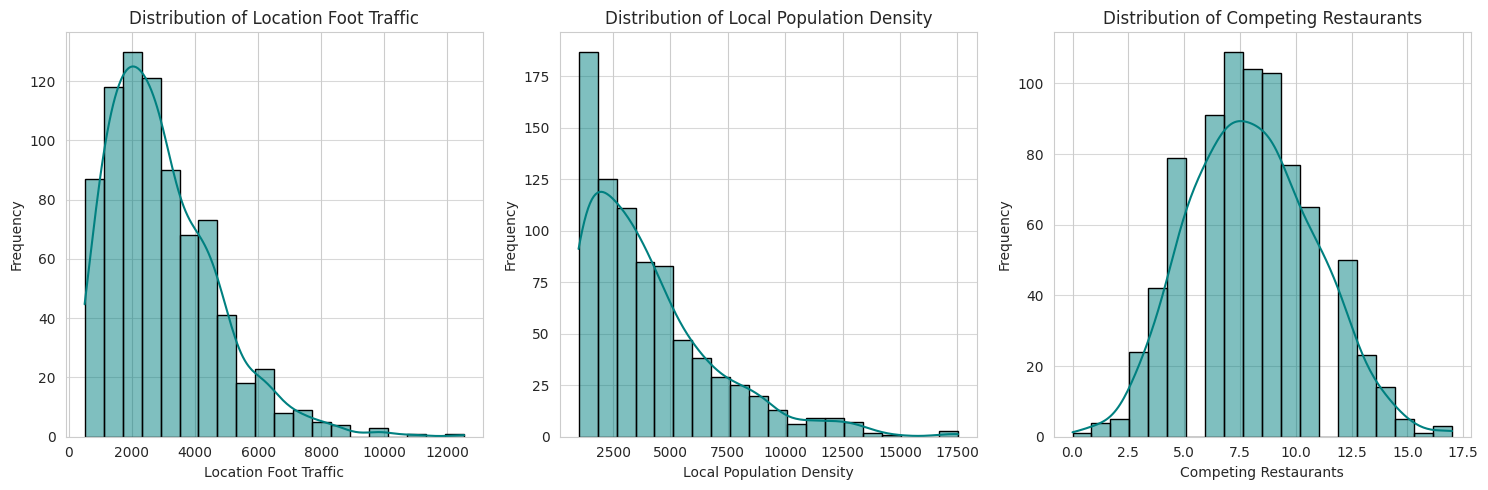


Descriptive Statistics for Features:
       Location_Foot_Traffic  Local_Population_Density  Competing_Restaurants
count              800.00000                800.000000             800.000000
mean              2960.37250               4054.411250               8.048750
std               1732.46988               2888.207068               2.812697
min                500.00000               1000.000000               0.000000
25%               1691.75000               1920.500000               6.000000
50%               2641.00000               3319.000000               8.000000
75%               3939.25000               5383.000000              10.000000
max              12531.00000              17532.000000              17.000000


In [ ]:
# Explore individual features

features = ['Location_Foot_Traffic', 'Local_Population_Density', 'Competing_Restaurants']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='teal', edgecolor='black')
    plt.title(f'Distribution of {feature.replace("_", " ")}', fontsize=12)
    plt.xlabel(feature.replace("_", " "), fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics for Features:")
print("="*70)
print(df[features].describe())

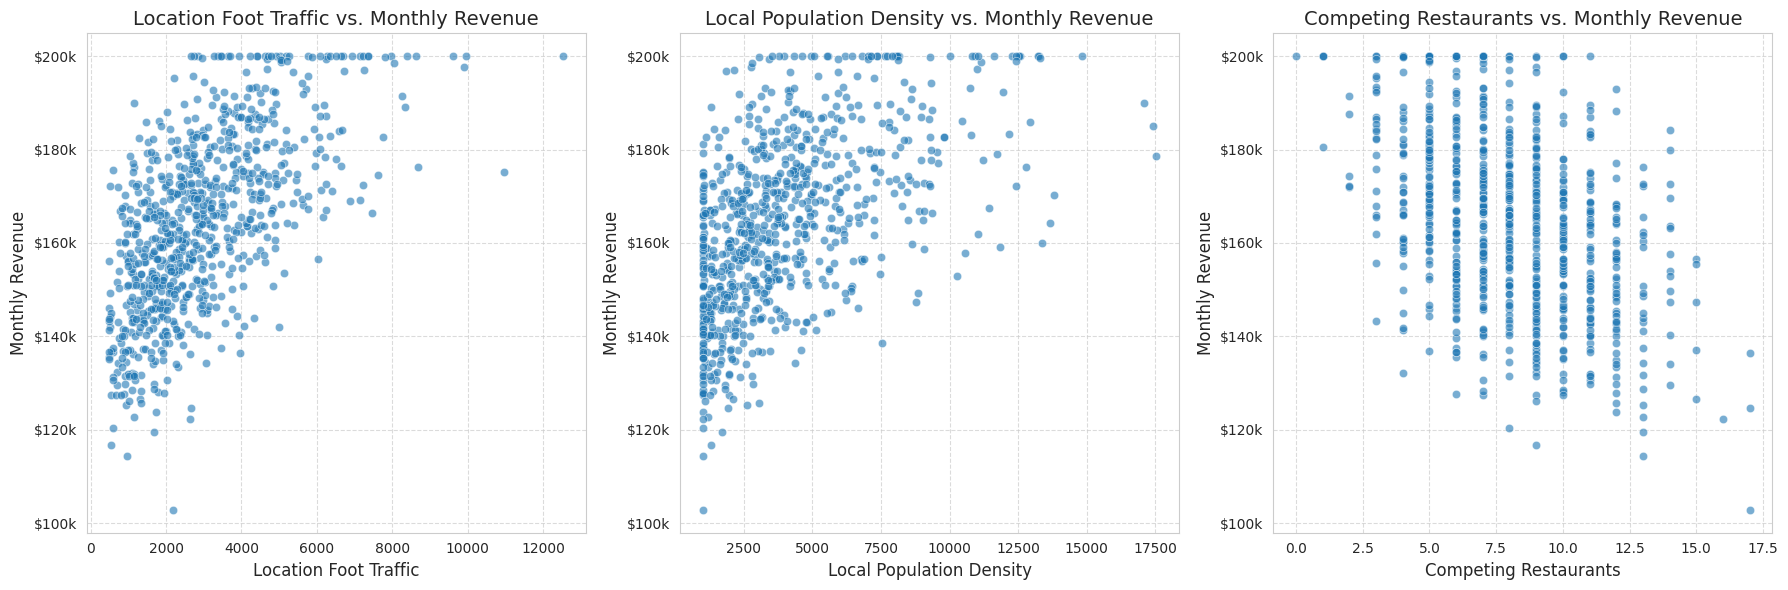


Correlation Matrix:
                          Location_Foot_Traffic  Local_Population_Density  \
Location_Foot_Traffic                  1.000000                  0.027639   
Local_Population_Density               0.027639                  1.000000   
Competing_Restaurants                 -0.026024                 -0.039906   
Monthly_Revenue                        0.618433                  0.545430   

                          Competing_Restaurants  Monthly_Revenue  
Location_Foot_Traffic                 -0.026024         0.618433  
Local_Population_Density              -0.039906         0.545430  
Competing_Restaurants                  1.000000        -0.446689  
Monthly_Revenue                       -0.446689         1.000000  


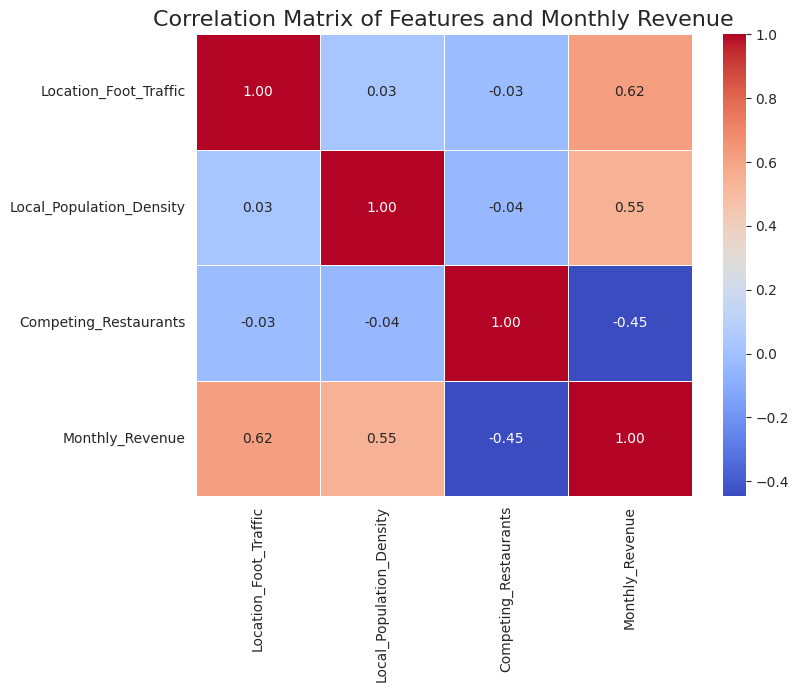

In [ ]:
# Explore relationships between features and target

features = ['Location_Foot_Traffic', 'Local_Population_Density', 'Competing_Restaurants']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Monthly_Revenue'], alpha=0.6)
    plt.title(f'{feature.replace("_", " ")} vs. Monthly Revenue', fontsize=14)
    plt.xlabel(feature.replace("_", " "), fontsize=12)
    plt.ylabel('Monthly Revenue', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Custom formatter for y-axis ticks
    formatter = FuncFormatter(lambda y, p: f'${y/1000:,.0f}k')
    plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print("="*70)
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features and Monthly Revenue', fontsize=16)
plt.show()

### 3.4 Key Insights from EDA

---


**Location_Foot_Traffic vs. Monthly Revenue:**
- *Scatterplot -->* This plot shows a generally positive relationship. As foot traffic increases, monthly revenue tends to increase. However, the relationship doesn't appear perfectly linear; there might be a point where increasing foot traffic yields diminishing returns, or the spread of revenue values widens at higher foot traffic.
- *Heatmap -->* There is a moderately strong positive correlation (0.62) between location foot traffic and monthly revenue. This means that as foot traffic increases, monthly revenue tends to increase, which aligns with our intuition and the scatter plot.

**Local_Population_Density vs. Monthly Revenue:**

- *Scatterplot -->* Similar to foot traffic, there's a positive trend here. Higher local population density seems to be associated with higher monthly revenue. Again, the relationship might not be strictly linear, with some potential for diminishing returns at very high densities.
- *Heatmap -->* Similar to foot traffic, local population density also has a moderate positive correlation (0.55) with monthly revenue. More people in the vicinity generally lead to higher revenue.

**Competing_Restaurants vs. Monthly Revenue:**

- *Scatterplot --> This plot suggests a more complex or inverse relationship. As the number of competing restaurants increases, the monthly revenue appears to decrease, or at least shows a less consistent positive trend compared to the other two features. There's a wider spread of revenue values at different levels of competition, and it's possible that beyond a certain number of competitors, the impact on revenue becomes more pronounced.
- *Heatmap -->* This shows a moderate negative correlation (-0.45). As the number of competing restaurants increases, monthly revenue tends to decrease. This also makes business sense: more competition can dilute the market share for individual restaurants.


## 4. Data Preparation

### 4.1 Handle Missing Values (if applicable)

In [ ]:
# Handle missing values if applicable
print("Missing Values:")
print("="*24)
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    for col, count in missing.items():
        pct = (count / len(df)) * 100
        print(f"{col}: {count} ({pct:.1f}%)")
else:
    print("No missing values found!")

Missing Values:
No missing values found!


### 4.2 Feature Engineering

In [ ]:
# Feature engineering
df['Log_Foot_Traffic'] = np.log1p(df['Location_Foot_Traffic'])
df['Log_Population_Density'] = np.log1p(df['Local_Population_Density'])

print("New features created: 'Log_Foot_Traffic' and 'Log_Population_Density'")
print("Dataframe with new features:")
display(df.head())

New features created: 'Log_Foot_Traffic' and 'Log_Population_Density'
Dataframe with new features:


,Location_Foot_Traffic,Local_Population_Density,Competing_Restaurants,Monthly_Revenue,Log_Foot_Traffic,Log_Population_Density
0,4828,4187,6,192424,8.482395,8.339979
1,1781,1000,10,128106,7.485492,6.908755
2,2006,5196,7,172474,7.604396,8.555837
3,4219,1899,7,170850,8.347590,7.549609
4,4037,1000,9,157511,8.303505,6.908755


---

To address the potential non-linear relationships and diminishing returns, we created new features by applying a logarithmic transformation (np.log1p) to Location_Foot_Traffic and Local_Population_Density. This can help to:
- **Linearize relationships:** Help make non-linear relationships with the target variable ('Monthly_Revenue') more linear, which benefits linear models.

- **Handle diminishing returns:** Account for the scenario where increasing a feature's value leads to proportionally smaller increases in revenue.

- **Reduce skewness:** Make the distributions of these features more symmetrical.

### 4.3 Define Features and Target

In [ ]:
# Separate features and target

X = df[['Competing_Restaurants', 'Log_Foot_Traffic', 'Log_Population_Density']]
y = df['Monthly_Revenue']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape[0]}")

Shape of X (features): (800, 3)
Shape of y (target): 800


### 4.4 Train-Test Split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape[0]}")
print(f"Shape of X_test: {X_test.shape[0]}")
print(f"Shape of y_train: {y_train.shape[0]}")
print(f"Shape of y_test: {y_test.shape[0]}")


Shape of X_train: 640
Shape of X_test: 160
Shape of y_train: 640
Shape of y_test: 160



---

We chose an 80/20 train-test split ratio (80% for training and 20% for testing) for the following reasons:

- *Sufficient Training Data:* With 800 observations in total, dedicating 80% (640 observations) to the training set provides ample data for the model to learn patterns and relationships effectively. This is crucial for developing a robust model, especially for regression tasks.

- *Representative Test Set:* The 20% test set (160 observations) is large enough to be a statistically representative sample of the overall dataset. This ensures that the model's performance evaluation on unseen data is reliable and provides a good indication of its generalization capabilities.

- *Common Practice:* An 80/20 or 70/30 split is a widely accepted and common practice in machine learning for datasets of this size. It balances the need for sufficient training data with the need for an adequate and independent test set for evaluation.

- *Avoid Overfitting/Underfitting:* This split helps in assessing whether the model is overfitting (performing well on training data but poorly on test data) or underfitting (performing poorly on both). A larger training set reduces the risk of underfitting, while a reasonably sized test set helps detect overfitting.

## 5. Model Development

### 5.1 Model Selection


We chose the Linear Regression model because this project requires predicting Monthly Revenue, which is a continuous numerical variable.



The dataset also contains three numeric features that generally have linear or near-linear relationships with the target. It also allows interpretability by allowing us to understand how each feature impacts revenue.

### 5.2 Train the Model

In [ ]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")
print(f'\n- Intercept: ${model.intercept_:.2f}')

# List of feature names
feature_names = ['Competing_Restaurants', 'Log_Foot_Traffic', 'Log_Population_Density']

# Print each coefficient with its feature name
print("\nCoefficients by feature:")
for name, coef in zip(feature_names, model.coef_):
    print(f"- {name}: ${coef:.2f}")

Model trained successfully.

- Intercept: $-77543.57

Coefficients by feature:
- Competing_Restaurants: $-2659.38
- Log_Foot_Traffic: $18138.07
- Log_Population_Density: $15027.77


### 5.3 Generate Predictions

In [ ]:
# Generate predictions

# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for display
results_df = pd.DataFrame({
    'Predicted Value': [f"${val:,.2f}" for val in y_pred[:10]],
    'Actual Value': [f"${val:,.2f}" for val in y_test.values[:10]]
})

# Print as a nice table
print("Predicted vs. Actual Monthly Revenue (First 10 Locations):")
print("="*58)
print(" Predicted Value   |   Actual Value")
print("-------------------|-------------------")
for p, a in zip(results_df['Predicted Value'], results_df['Actual Value']):
    print(f" {p:<17} |   {a:<15}")

Predicted vs. Actual Monthly Revenue (First 10 Locations):
 Predicted Value   |   Actual Value
-------------------|-------------------
 $161,287.74       |   $151,985.00    
 $146,534.65       |   $156,836.00    
 $199,096.98       |   $200,000.00    
 $194,088.84       |   $199,544.00    
 $135,488.79       |   $141,650.00    
 $163,209.94       |   $168,152.00    
 $173,571.66       |   $167,853.00    
 $184,127.17       |   $190,834.00    
 $163,842.85       |   $158,046.00    
 $150,828.56       |   $157,783.00    


---

## 6. Model Evaluation


### 6.1 Performance Metrics

In [ ]:
# Calculate performance metrics for regression

# Ensure predictions exist
# y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R-squared
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"- Mean Absolute Error (MAE): ${mae:,.3f}")
print(f"- Mean Squared Error (MSE): ${mse:,.3f}")
print(f"- Root Mean Squared Error (RMSE): ${rmse:,.3f}")
print(f"- R-squared (R²): {r2:.3f}")

- Mean Absolute Error (MAE): $5,273.291
- Mean Squared Error (MSE): $42,468,272.667
- Root Mean Squared Error (RMSE): $6,516.769
- R-squared (R²): 0.884


Mean Absolute Error (MAE): $5,273.29

On average, our model's monthly revenue predictions are off by about 5,273 dollars, which is pretty small compared to the mean revenue of $164,231.


Root Mean Squared Error (RMSE): $6,516.77

RMSE penalizes larger errors more heavily. An RMSE of $6,516 shows that the model’s largest deviations from actual values still aren't too big.

R-squared (R²): 0.884

The model explains approximately 88.4% of the variance in monthly revenue. This shows a strong fit to the data.

### 6.2 Residual Plot (Regression)

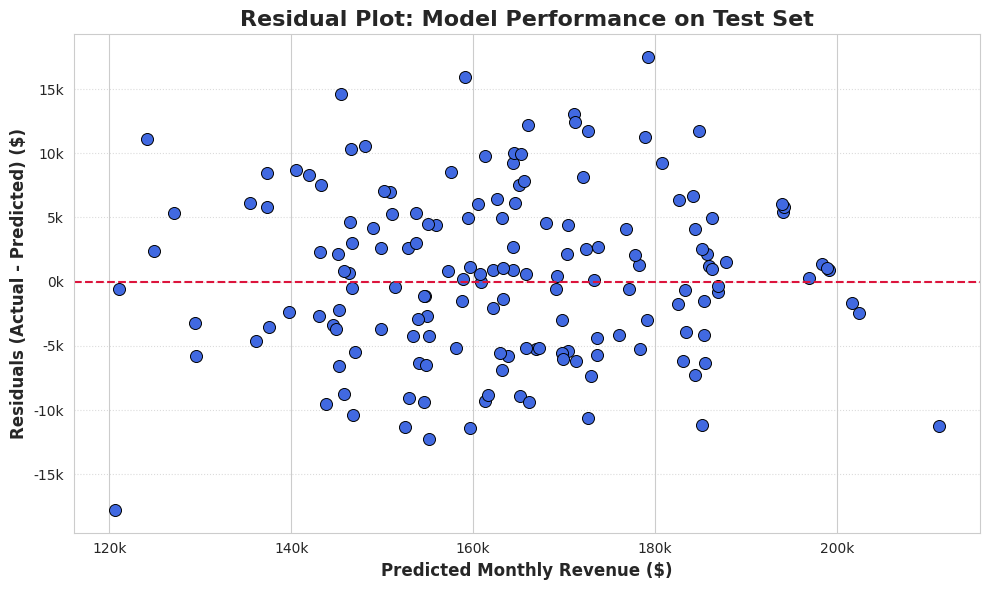

In [ ]:
# Create confusion matrix or residual plot

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='royalblue', edgecolor='black', s=75)
plt.axhline(0, color='crimson', linestyle='--', linewidth=1.5)
plt.xlabel('Predicted Monthly Revenue ($)', fontsize=12, fontweight='bold')
plt.ylabel('Residuals (Actual - Predicted) ($)', fontsize=12, fontweight='bold')
plt.title('Residual Plot: Model Performance on Test Set', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Custom formatter for axes
formatter = FuncFormatter(lambda x, _: f'{x/1000:,.0f}k')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In the residual plot there is a random scattering of residual plots across the 0 line. This proves that the relationship between the independent variables and the dependent variable is linear. The model errors also have a constant variance (homoscedasticity).

This proves that the linear regression model used to predict monthly revenue appears to be a good fit for the data.


---

## 7. Model Interpretation

### 7.1 Coefficient Analysis

In [ ]:
# Extract and display coefficients
reg_intercept = model.intercept_
reg_coefficient = model.coef_
feature_names = X_train.columns

In [ ]:
# Visualize coefficients
# orders coefficients and pairs them with feature name
coef_df = pd.DataFrame(reg_coefficient, index = feature_names, columns=['Coefficient'])
print(f"Intercept: {reg_intercept}")
print(f"{coef_df.sort_values(by='Coefficient', ascending = False)}")
# competing restaurants causes decrease, other factors scale positively (remove this)

Intercept: -77543.57148861652
                         Coefficient
Log_Foot_Traffic        18138.065600
Log_Population_Density  15027.768411
Competing_Restaurants   -2659.375824


### 7.3 Business Interpretation


- **Which features have the strongest effect on the target?** - Foot traffic is the strongest predictor of revenue, and is a positive predictor.

- **How does each unit change in a feature affect the target?** - A one-unit change in the log of foot traffic and population density are strongly associated with a positive increase in predicted revenue. The addition of one more competing restaurant has a negative impact on predicted revenue, decreasing by approximately $2,659.38.

- **Are there any surprising relationships?** - All of the relationships make sense when considered using business logic.

---

## 8. Business Insights and Recommendations

### 8.1 Key Findings

1. High foot traffic and population density correlates with higher revenue, but there is an element of diminishing returns
2. A increased number of competing restaurants correlates with a decrease in revenue.
3. The average monthly revenue for a restaurant is $164,231. The model is explains approximately 88.4% of variance in revenue, meaning that foot traffic, population density, and competing restaurants are all incredibly important factors in predicting revenue.

### 8.2 Business Recommendations

1. Don't build in locations with a high number of relevant competitors, even if the potential for high foot traffic is there.
2. Areas with higher population density or better foot traffic are likely to have higher rent costs. Since there are diminishing returns on those two factors, we should select sites that maximize revenue before the curve flattens out.
3. The model's accurracy tells us that the three factors measured are key predictors of success. We could create a scoring system by assigning weights to each factor in order to determine if a location fulfills our requirements.

### 8.3 Limitations

- **What assumptions did you make?** That the relationship between the coefficients and revenue is linear, and that there is minimal or no multicollinearity.
- **What are the model's weaknesses?** There is potential that there is another important predictor that is missing from the model, causing our current coefficients to be biased.
- **What additional data would be helpful?** Reviews/ average ratings. Knowing how customers feel about the quality of restaurant, and if they are willing to recommend it to others, is a key consideration, it's especially important as a way to compare two competing restaurants.
- **What factors were not considered?** Prices, reviews, operating hours. Understanding the pricing of other restaurants in the surrounding area is important for making a location decision. We need to consider if our restaurant is competitvely priced.

### 8.4 Next Steps
1. We can optimize site selection by analyzing the ratio of rent to revenue. We can compare the marginal revenue gain from foot traffic and population density, and select only the locations which maximize revenue without the per unit increase being past the point of diminishing returns.  
2. Ratings.
3. [Next step 3]

---

## 9. Conclusion

[Provide a concise conclusion that ties everything together:]

- Restate the business problem
- Summarize your approach
- Highlight the key insights
- Emphasize the business value of your findings
- End with final thoughts or call to action

[Write your conclusion here]

---

## References

[If you used any external resources, code snippets, or references, cite them here]

---

**End of Report**